# How to calculate expectation value of an operator in qiskit

In [33]:
import qiskit
print(qiskit.__version__)

0.25.2


In [10]:
from qiskit import QuantumCircuit, execute, Aer
import numpy as np
from qiskit.opflow import Z, X, I, StateFn, PauliSumOp, AerPauliExpectation, CircuitOp, CircuitStateFn
from qiskit.algorithms.optimizers import COBYLA, SPSA, SLSQP
from qiskit.circuit.library import RealAmplitudes
from qiskit.utils import QuantumInstance
from qiskit.algorithms import VQE
from qiskit.algorithms import MinimumEigensolverResult
from qiskit.algorithms import QAOA

C:\Users\Owais\AppData\Local\Temp\ipykernel_24108\3673262404.py:7: DeprecationWarning: The class ``qiskit.opflow.primitive_ops.circuit_op.CircuitOp`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  op = CircuitOp(qc)


     ┌───┐
q_0: ┤ Z ├
     ├───┤
q_1: ┤ Z ├
     └───┘


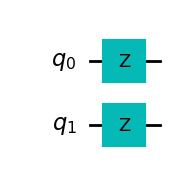

In [36]:
# Step 1: Prepare the quantum state
# For this example, we'll prepare a Bell state
qc = QuantumCircuit(2)
qc.z(0)
qc.z(1)

op = CircuitOp(qc)
print(op)
qc.draw("mpl")

In [37]:
# provide some coefficient as weight to observable O in this case X

op = (-1.0523732*I^I) + (0.39793742*I^Z) - (0.3979374*Z^I) +(-0.0112801 * Z^Z) + (0.18093119 * X^X) 
print(op)

-1.0523732 * II
+ 0.39793742 * IZ
- 0.3979374 * ZI
- 0.0112801 * ZZ
+ 0.18093119 * XX


CircuitStateFn(
     ┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ X ├
     └───┘
)


C:\Users\Owais\AppData\Local\Temp\ipykernel_24108\3844667968.py:7: DeprecationWarning: The class ``qiskit.opflow.state_fns.circuit_state_fn.CircuitStateFn`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  psii = CircuitStateFn(psi)


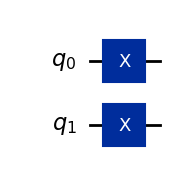

In [41]:
# define the state  which you want the expectation value
psi = QuantumCircuit(2)
psi.x(0)
psi.x(1)

# convert to a state
psii = CircuitStateFn(psi)

print(psii)
psi.draw("mpl", style="iqx")

In [43]:
print("Exact expectationValue", psii.adjoint().compose(op).compose(psii).eval().real)

Exact expectationValue -1.0636533199999998


In [44]:
from qiskit.opflow.state_fns import StateFn

measurement_expression = StateFn(op, is_measurement = True).compose(psii)
print(measurement_expression)

ComposedOp([
  OperatorMeasurement(-1.0523732 * II
  + 0.39793742 * IZ
  - 0.3979374 * ZI
  - 0.0112801 * ZZ
  + 0.18093119 * XX),
  CircuitStateFn(
       ┌───┐
  q_0: ┤ X ├
       ├───┤
  q_1: ┤ X ├
       └───┘
  )
])


C:\Users\Owais\AppData\Local\Temp\ipykernel_24108\654554329.py:3: DeprecationWarning: The class ``qiskit.opflow.state_fns.operator_state_fn.OperatorStateFn`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  measurement_expression = StateFn(op, is_measurement = True).compose(psii)


In [45]:
from qiskit.opflow.expectations import PauliExpectation
# convert pauli measurement back to z basis
expectation = PauliExpectation().convert(measurement_expression)
print(expectation)

SummedOp([
  ComposedOp([
    OperatorMeasurement(0.18093119 * ZZ
    - 1.0523732 * II),
    CircuitStateFn(
         ┌───┐┌───┐
    q_0: ┤ X ├┤ H ├
         ├───┤├───┤
    q_1: ┤ X ├┤ H ├
         └───┘└───┘
    )
  ]),
  ComposedOp([
    OperatorMeasurement(0.39793742 * IZ
    - 0.3979374 * ZI
    - 0.0112801 * ZZ),
    CircuitStateFn(
         ┌───┐
    q_0: ┤ X ├
         ├───┤
    q_1: ┤ X ├
         └───┘
    )
  ])
])


C:\Users\Owais\AppData\Local\Temp\ipykernel_24108\261632645.py:3: DeprecationWarning: The class ``qiskit.opflow.expectations.pauli_expectation.PauliExpectation`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  expectation = PauliExpectation().convert(measurement_expression)


In [46]:
from qiskit.opflow.converters import CircuitSampler
from qiskit.providers.aer import QasmSimulator

simulator = QasmSimulator()
sampler = CircuitSampler(simulator).convert(expectation)

print("Sampled: ", sampler.eval().real)

C:\Users\Owais\AppData\Local\Temp\ipykernel_24108\1075136291.py:5: DeprecationWarning: The class ``qiskit.opflow.converters.circuit_sampler.CircuitSampler`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  sampler = CircuitSampler(simulator).convert(expectation)


Sampled:  -1.0714277070703122


In [48]:
from qiskit import Aer
from qiskit.utils import QuantumInstance

backend = Aer.get_backend('qasm_simulator')
qi = QuantumInstance(backend=backend, shots=1024)

# Step 2: Define the statw to sample
measurable_expression = StateFn(op, is_measurement=True).compose(psii)
print(measurable_expression)

# Step 3: Convert the expression to a sampler
expectation = PauliExpectation().convert(measurable_expression)
print(expectation)

# get state sampler 
sampler = CircuitSampler(backend=backend).convert(expectation)

# Step 4: Sample the state
sampled_expectation = sampler.eval().real
print("Sampled:", sampled_expectation)

C:\Users\Owais\AppData\Local\Temp\ipykernel_24108\3602720768.py:5: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  qi = QuantumInstance(backend=backend, shots=1024)
C:\Users\Owais\AppData\Local\Temp\ipykernel_24108\3602720768.py:8: DeprecationWarning: The class ``qiskit.opflow.state_fns.operator_state_fn.OperatorStateFn`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  measurable_expression = StateFn(op, is_measurement=True).compose(psii)
C:\Users\Owais\AppData\Local\Temp\ipykernel_24108\3602720768.py:12: DeprecationWarning: The class ``qiskit.opflow.expectations.pauli_expectation.PauliExpectation`` is deprecated as of qiskit-terra 0.24.0. It will 

ComposedOp([
  OperatorMeasurement(-1.0523732 * II
  + 0.39793742 * IZ
  - 0.3979374 * ZI
  - 0.0112801 * ZZ
  + 0.18093119 * XX),
  CircuitStateFn(
       ┌───┐
  q_0: ┤ X ├
       ├───┤
  q_1: ┤ X ├
       └───┘
  )
])
SummedOp([
  ComposedOp([
    OperatorMeasurement(0.18093119 * ZZ
    - 1.0523732 * II),
    CircuitStateFn(
         ┌───┐┌───┐
    q_0: ┤ X ├┤ H ├
         ├───┤├───┤
    q_1: ┤ X ├┤ H ├
         └───┘└───┘
    )
  ]),
  ComposedOp([
    OperatorMeasurement(0.39793742 * IZ
    - 0.3979374 * ZI
    - 0.0112801 * ZZ),
    CircuitStateFn(
         ┌───┐
    q_0: ┤ X ├
         ├───┤
    q_1: ┤ X ├
         └───┘
    )
  ])
])
Sampled: -1.064713463691406


In [49]:
expectation = PauliExpectation().convert(measurable_expression)
print(expectation)

# get state sampler
sampler = CircuitSampler(backend=backend).convert(expectation)
print("Snapshot: ", sampler.eval().real)

SummedOp([
  ComposedOp([
    OperatorMeasurement(0.18093119 * ZZ
    - 1.0523732 * II),
    CircuitStateFn(
         ┌───┐┌───┐
    q_0: ┤ X ├┤ H ├
         ├───┤├───┤
    q_1: ┤ X ├┤ H ├
         └───┘└───┘
    )
  ]),
  ComposedOp([
    OperatorMeasurement(0.39793742 * IZ
    - 0.3979374 * ZI
    - 0.0112801 * ZZ),
    CircuitStateFn(
         ┌───┐
    q_0: ┤ X ├
         ├───┤
    q_1: ┤ X ├
         └───┘
    )
  ])
])
Snapshot:  -1.061886413847656


C:\Users\Owais\AppData\Local\Temp\ipykernel_24108\1952905658.py:1: DeprecationWarning: The class ``qiskit.opflow.expectations.pauli_expectation.PauliExpectation`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  expectation = PauliExpectation().convert(measurable_expression)
C:\Users\Owais\AppData\Local\Temp\ipykernel_24108\1952905658.py:5: DeprecationWarning: The class ``qiskit.opflow.converters.circuit_sampler.CircuitSampler`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  sampler = CircuitSampler(backend=backend).convert(expectation)


In [50]:
from qiskit.opflow import MatrixExpectation, CircuitSampler

expectation = MatrixExpectation().convert(measurable_expression)
sampler = CircuitSampler(backend=backend).convert(expectation)
print("Matrix: ", sampler.eval().real)

Matrix:  -1.0636533199999998


C:\Users\Owais\AppData\Local\Temp\ipykernel_24108\4073710819.py:3: DeprecationWarning: The class ``qiskit.opflow.expectations.matrix_expectation.MatrixExpectation`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  expectation = MatrixExpectation().convert(measurable_expression)
C:\Users\Owais\AppData\Local\Temp\ipykernel_24108\4073710819.py:4: DeprecationWarning: The class ``qiskit.opflow.converters.circuit_sampler.CircuitSampler`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  sampler = CircuitSampler(backend=backend).convert(expectation)


In [51]:
from qiskit import QuantumCircuit, Aer
from qiskit.opflow import CircuitStateFn, PauliSumOp, CircuitSampler, StateFn, MatrixExpectation
from qiskit.utils import QuantumInstance

# Step 1: Prepare the quantum state |Ψ⟩
# For this example, we'll prepare a Bell state
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
psi = CircuitStateFn(qc)

# Step 2: Construct the operator HZH
# HZH = Z in the X-basis
op = PauliSumOp.from_list([('ZZ', 1)])

# Step 3: Use the StateFn class to represent the state and the operator
measurable_expression = StateFn(op, is_measurement=True).compose(psi)

# Step 4: Use the CircuitSampler and MatrixExpectation classes to calculate the expectation value
backend = Aer.get_backend('qasm_simulator')
qi = QuantumInstance(backend=backend, shots=1024)

sampler = CircuitSampler(qi)
expectation = MatrixExpectation().convert(measurable_expression)
sampled_expectation = sampler.convert(expectation)

# Calculate the expectation value
expectation_value = sampled_expectation.eval().real
print("The expectation value is", expectation_value)

The expectation value is 0.9999999999999999


C:\Users\Owais\AppData\Local\Temp\ipykernel_24108\1704070335.py:10: DeprecationWarning: The class ``qiskit.opflow.state_fns.circuit_state_fn.CircuitStateFn`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  psi = CircuitStateFn(qc)
C:\Users\Owais\AppData\Local\Temp\ipykernel_24108\1704070335.py:17: DeprecationWarning: The class ``qiskit.opflow.state_fns.operator_state_fn.OperatorStateFn`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  measurable_expression = StateFn(op, is_measurement=True).compose(psi)
C:\Users\Owais\AppData\Local\Temp\ipykernel_24108\1704070335.py:21: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than

To calculate the expectation value of the operator M as defined in your equation, you can follow these steps:

1. Prepare the quantum state |Ψ⟩. For this example, let's assume |Ψ⟩ is a Bell state.
2. Construct the operators P+ and P-. In Qiskit, you can create these as PauliSumOp.
3. Use the StateFn class to represent the state and the operators.
4. Use the CircuitSampler and MatrixExpectation classes to calculate the expectation values.
5. Add the expectation values of P+ and P- to get the expectation value of M.

Now let's do coding

In [52]:
from qiskit import QuantumCircuit, Aer
from qiskit.opflow import CircuitStateFn, PauliSumOp, CircuitSampler, StateFn, MatrixExpectation
from qiskit.utils import QuantumInstance

# Step 1: Prepare the quantum state |Ψ⟩
# For this example, we'll prepare a Bell state
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
psi = CircuitStateFn(qc)

# Step 2: Construct the operators P+ and P-
# For this example, let's assume P+ is ZZ and P- is XX
p_plus = PauliSumOp.from_list([('ZZ', 1)])
p_minus = PauliSumOp.from_list([('XX', 1)])

# Step 3: Use the StateFn class to represent the state and the operators
measurable_expression_plus = StateFn(p_plus, is_measurement=True).compose(psi)
measurable_expression_minus = StateFn(p_minus, is_measurement=True).compose(psi)

# Step 4: Use the CircuitSampler and MatrixExpectation classes to calculate the expectation values
backend = Aer.get_backend('qasm_simulator')
qi = QuantumInstance(backend=backend, shots=1024)

sampler = CircuitSampler(qi)
expectation_plus = MatrixExpectation().convert(measurable_expression_plus)
expectation_minus = MatrixExpectation().convert(measurable_expression_minus)
sampled_expectation_plus = sampler.convert(expectation_plus)
sampled_expectation_minus = sampler.convert(expectation_minus)

# Calculate the expectation values
expectation_value_plus = sampled_expectation_plus.eval().real
expectation_value_minus = sampled_expectation_minus.eval().real

# Step 5: Add the expectation values of P+ and P- to get the expectation value of M
expectation_value_m = expectation_value_plus + expectation_value_minus
print("The expectation value of M is", expectation_value_m)

The expectation value of M is 1.9997691841774579


C:\Users\Owais\AppData\Local\Temp\ipykernel_24108\3356517937.py:10: DeprecationWarning: The class ``qiskit.opflow.state_fns.circuit_state_fn.CircuitStateFn`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  psi = CircuitStateFn(qc)
C:\Users\Owais\AppData\Local\Temp\ipykernel_24108\3356517937.py:18: DeprecationWarning: The class ``qiskit.opflow.state_fns.operator_state_fn.OperatorStateFn`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  measurable_expression_plus = StateFn(p_plus, is_measurement=True).compose(psi)
C:\Users\Owais\AppData\Local\Temp\ipykernel_24108\3356517937.py:19: DeprecationWarning: The class ``qiskit.opflow.state_fns.operator_state_fn.OperatorStateFn`` is deprecated as of qiskit-terra 0.24.0. It will be re

$$\langle\Psi| M |\Psi\rangle = \sum_{j}\Psi_{j}{} \langle m_{j} | M | ( \sum_{i} \Psi_{i} |m_{i} \rangle )$$

which is equal to 
$$\langle\Psi| M |\Psi\rangle = \sum_{i,j} \Psi_{j}^{*} * \Psi_{i} * m_{i} \langle m_{j} | m_{i} \rangle $$

$$\langle\Psi| M |\Psi\rangle = \sum_{i} |\Psi_{i}|^{2} m_[i] $$ 

where 

$$\langle\Psi| M |\Psi\rangle = \sum_{i} P_{i} m_{i} $$

$$\langle M \rangle = (+1)P_{+} - (-1)P_{-} = P_{+} + P_{-} $$

The above equations we ve written describe the process of calculating the expectation value of an operator M in quantum mechanics. In the context of quantum computing, this process is often done by preparing a quantum state |Ψ⟩, applying the operator M, and then measuring the resulting state.

In your case, M is defined as M = P+ - P-, where P+ and P- are projectors onto the +1 and -1 eigenstates of M, respectively. The expectation value of M is then given by ⟨M⟩ = ⟨Ψ|M|Ψ⟩ = P+ - P-

In [53]:
from qiskit import QuantumCircuit, Aer
from qiskit.opflow import CircuitStateFn, PauliSumOp, CircuitSampler, StateFn, MatrixExpectation
from qiskit.utils import QuantumInstance

# Step 1: Prepare the quantum state |Ψ⟩
# For this example, we'll prepare a Bell state
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
psi = CircuitStateFn(qc)

# Step 2: Construct the operators P+ and P-
# For this example, let's assume P+ is ZZ and P- is XX
p_plus = PauliSumOp.from_list([('ZZ', 1)])
p_minus = PauliSumOp.from_list([('XX', 1)])

# Step 3: Use the StateFn class to represent the state and the operators
measurable_expression_plus = StateFn(p_plus, is_measurement=True).compose(psi)
measurable_expression_minus = StateFn(p_minus, is_measurement=True).compose(psi)

# Step 4: Use the CircuitSampler and MatrixExpectation classes to calculate the expectation values
backend = Aer.get_backend('qasm_simulator')
qi = QuantumInstance(backend=backend, shots=1024)

sampler = CircuitSampler(qi)
expectation_plus = MatrixExpectation().convert(measurable_expression_plus)
expectation_minus = MatrixExpectation().convert(measurable_expression_minus)
sampled_expectation_plus = sampler.convert(expectation_plus)
sampled_expectation_minus = sampler.convert(expectation_minus)

# Calculate the expectation values
expectation_value_plus = sampled_expectation_plus.eval().real
expectation_value_minus = sampled_expectation_minus.eval().real

# Step 5: Subtract the expectation values of P- from P+ to get the expectation value of M
expectation_value_m = expectation_value_plus - expectation_value_minus
print("The expectation value of M is", expectation_value_m)

The expectation value of M is 4.7684852743090644e-05


C:\Users\Owais\AppData\Local\Temp\ipykernel_24108\3501111290.py:10: DeprecationWarning: The class ``qiskit.opflow.state_fns.circuit_state_fn.CircuitStateFn`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  psi = CircuitStateFn(qc)
C:\Users\Owais\AppData\Local\Temp\ipykernel_24108\3501111290.py:18: DeprecationWarning: The class ``qiskit.opflow.state_fns.operator_state_fn.OperatorStateFn`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  measurable_expression_plus = StateFn(p_plus, is_measurement=True).compose(psi)
C:\Users\Owais\AppData\Local\Temp\ipykernel_24108\3501111290.py:19: DeprecationWarning: The class ``qiskit.opflow.state_fns.operator_state_fn.OperatorStateFn`` is deprecated as of qiskit-terra 0.24.0. It will be re